/Users/roberto/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


<IPython.core.display.Javascript object>


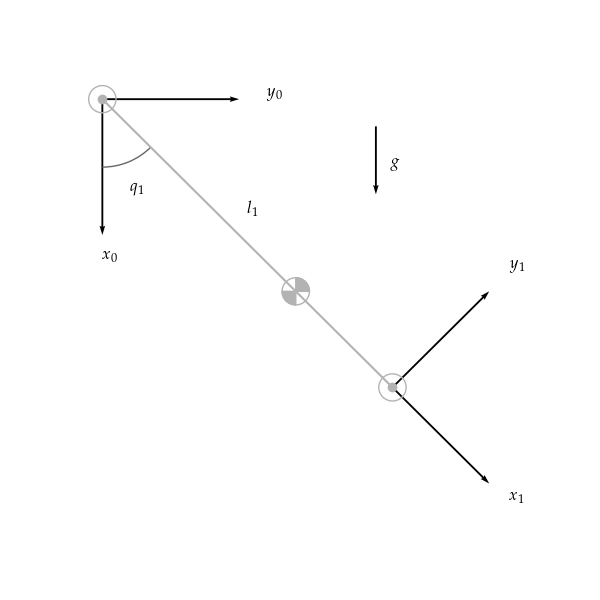

In [1]:
%matplotlib notebook
from matplotlib.pyplot import figure
from matplotlib import rc
from matplotlib.patches import Arc, Circle, Wedge

from numpy import sin, cos, pi, matrix, array, eye, degrees

def rot_z(θ):
    from numpy import sin, cos, matrix
    A = matrix([[cos(θ), -sin(θ), 0, 0],
                [sin(θ), cos(θ), 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1]])
    return A

def tras_x(x):
    from numpy import matrix
    A = matrix([[1, 0, 0, x],
                [0, 1, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1]])
    return A

def ejes(axis, origen, orientacion, long=0.5):
    
    i = orientacion[:3, :1].T.tolist()[0]
    j = orientacion[:3, 1:2].T.tolist()[0]
    k = orientacion[:3, 2:3].T.tolist()[0]    
    
    xs, ys, zs = origen.T.tolist()[0]
    us, vs, ws = zip(i)
    axis.quiver(xs, ys, us, vs, scale=2, scale_units="xy", angles="xy", color="k", width=0.004)

    us, vs, ws = zip(j)
    axis.quiver(xs, ys, us, vs, scale=2, scale_units="xy", angles="xy", color="k", width=0.004)

τ = 2*pi
δ = 0.1
l1 = 1
L1 = 1.5
q1 = -τ/8

A1 = rot_z(q1)*tras_x(L1)
Ac = rot_z(q1)*tras_x(l1)

Hc = Ac
H1 = A1

oc = Hc[:3, 3:]
xc = Hc[:3, :1]
yc = Hc[:3, 1:2]

R1 = H1[:3, :3]
o1 = H1[:3, 3:]
x1 = H1[:3, :1]
y1 = H1[:3, 1:2]

o0 = matrix([[0, 0, 0]]).T
R0 = rot_z(-τ/4)

xs = [o0.item(0), o1.item(0)]
ys = [o0.item(1), o1.item(1)]

p_l1 = o0 + (L1/2)*x1

rc('font',**{'family':'serif','serif':['Palatino'], 'size':14.0})
rc('text', usetex=True)

tam=(6, 6)
tls=True

fig = figure(figsize=tam)
ax = fig.gca()

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.axes.spines["top"].set_color("none")
ax.axes.spines["bottom"].set_color("none")
ax.axes.spines["left"].set_color("none")
ax.axes.spines["right"].set_color("none")

ax.axes.set_xlim(-δ, 1.5 + δ)
ax.axes.set_ylim(-1.5 - δ, δ)

eje0 = Circle([o0.item(0), o0.item(1)], 0.05, ec='333')
eje0.set_fill(False)
ax.add_patch(eje0)

eje1 = Circle([o1.item(0), o1.item(1)], 0.05, ec='333')
eje1.set_fill(False)
ax.add_patch(eje1)

wedge1 = Wedge([oc.item(0), oc.item(1)], 0.05, 0, 90, ec="333", fc="333")
ax.add_patch(wedge1)
wedge2 = Wedge([oc.item(0), oc.item(1)], 0.05, 180, 270, ec="333", fc="333")
ax.add_patch(wedge2)
eje2 = Circle([oc.item(0), oc.item(1)], 0.05, ec='333')
eje2.set_fill(False)
ax.add_patch(eje2)

acot1 = Arc([o0.item(0), o0.item(1)], 0.5, 0.5, 0, 270, degrees(q1), color="666")
ax.add_patch(acot1)

ax.plot(xs, ys, "-o", color="333")

ejes(ax, o0, R0)
ejes(ax, o1, R1)
ax.quiver([1], [-δ], [0], [-0.5], scale=2, scale_units="xy", angles="xy", color="k", width=0.004)

ax.text(xs[0], ys[0] - 0.5 - δ, r'$x_0$', size=12)        
ax.text(xs[0] + 0.5 + δ, ys[0], r'$y_0$', size=12)

ax.text(xs[1] + (δ + 0.5)*x1.item(0), ys[1] + (δ + 0.5)*x1.item(1), r'$x_1$', size=12)        
ax.text(xs[1] + (δ + 0.5)*y1.item(0), ys[1] + (δ + 0.5)*y1.item(1), r'$y_1$', size=12)

ax.text(1 + 0.5*δ, -0.25, r'$g$', size=12) 

ax.text(p_l1.item(0), p_l1.item(1) + δ, r'$l_1$', size=12)

ax.text(xs[0] + δ, xs[0] - 0.25- δ, r'$q_1$', size=12);